In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from cl.eval import EvalReader as EPPS
import seaborn as sns
import numpy as np
import os


In [6]:
printn = print
def print1(*arg, **karg):
    pass

def common_parse(name, add):
    if name.find("pertask")>=0:
        _, tid, fold = name.split("_")
        name = "{} on fold {}".format(tid, fold)
    return "Result of Task {} {}:".format(name, add)
def listdct_to_dct(lst, kname, vname):
    ret = {}
    for d in lst:
        ret[tuple(d[kname])] = d[vname]
    return ret
def parse_pairwise_ic(name, measure):
    tname = common_parse(name, "Pairwise Inconsistency")
    print(tname)
    pairwise = listdct_to_dct(measure["inconsist_pairwise"], kname="compare", vname="consistency")
    idx = measure["index"]
    l = len(idx)
    _idx_name = ["Model {}".format(i) for i in idx]
    _df = pd.DataFrame(index = _idx_name[:-1], columns = _idx_name[1:]).fillna("")
    for i in range(l):
        for j in range(i+1, l):
            _df.loc[_idx_name[i], _idx_name[j]] = pairwise[(idx[i],idx[j])]
    #_df.style.set_caption(tname)
    print(_df)
    return _df

def parse_acc(name, measure):
    print(common_parse(name, "Accuracy Per Step"))
    for i in range(len(measure["index"])):
        print(measure["acc_list"][i], end="\t")
    print("avg acc", np.mean(measure["acc_list"]))
    return np.mean(measure["acc_list"])#measure["acc_list"][0]#np.mean(measure["acc_list"])#measure["acc_list"][-1]#

def parse_total(name, measure):
    print(common_parse(name, "Inconsistency Together"))
    print(measure["inconsist_tot"])
    return measure["inconsist_tot"]

def filter_lst(lst, s):
    rst = []
    for _s in lst:
        if _s.find(s)>=0:
            rst.append(_s)
    return rst

def sname(lst):
    global common_filter
    lst += common_filter
    dn = os.listdir("results")
    for s in lst:
        dn = filter_lst(dn, s)
    if len(dn) > 1:
        print("multiple result" + str(dn))
    mx_sz = 1000
    mx_id = 0
    for idx, _d in enumerate(dn):
        if len(_d) < mx_sz:
            mx_sz = len(_d)
            mx_id = idx
    printn(dn[mx_id])
    return os.path.join("results", dn[mx_id], "Seed0")

In [7]:
def read_result(evaluator, bname):
    global rec
    e = evaluator
    print("="*50)
    rec[bname] = []
    print(bname)
    for name in e.names:
        parse_pairwise_ic(name, e._measure_pairwise(name))
        print()
        acc = parse_acc(name,e._measure_acc(name))
        print()
        tot = parse_total(name, e._measure([name]))
        true_name = "_".join(name.split("_")[-2:])
        rec[bname].append((true_name,tot,acc))
        print(tot)
def draw_pic(picname, names):
    
    #names = [ ]#, "lwf_scratch", "ewc_scratch", "vanilla_scratch",]
    tasks = []
    vals = []
    comps = []
    accs = []
    print(rec)
    for keyword in ["train", "test", "val"]:
        for name in names:
            for v in rec[name]:
                task, val, acc = v
                if task.find(keyword)<0:
                    continue
                comps.append(name)
                tasks.append(task)
                accs.append(acc)
                vals.append(val)
    plt.figure(figsize=(25,10))
    plt.subplot(1,2,1)
    df = pd.DataFrame({"Task":tasks, "Method":comps, "Inconsistency":vals, "Acc":accs})
    pd.melt(df, id_vars=['Task'], value_vars=['Inconsistency'])
    sns.barplot(x = 'Task', y = 'Inconsistency', data = df, hue="Method")
    plt.ylabel('Inconsistency')
    plt.title('Inconsistency over different baselins')
    #plt.savefig("Inconsistency_{}.png".format(picname))
    #plt.show()
    #plt.figure(figsize=(10,10))
    plt.subplot(1,2,2)
    df = pd.DataFrame({"Task":tasks, "Method":comps, "Inconsistency":vals, "Acc":accs})
    pd.melt(df, id_vars=['Task'], value_vars=['Acc'])
    sns.barplot(x = 'Task', y = 'Acc', data = df, hue="Method")
    plt.ylabel('Acc')
    plt.title('Acc over different baselins')
    plt.savefig("Acc_{}.png".format(picname))
    plt.show()

multiple result['cifar10_small_ResNet18_1.0e-03_#scratch_DScifar10_CIMmask_CTdata_inc_DAsequential_CvgD1.00e+00_CvgT1.000000e-03_DomS5_FixInit', 'cifar10_small#Aug_CF_ResNet18_1.0e-03_#scratch_DScifar10_CIMmask_CTdata_inc_DAsequential_CvgD1.00e+00_CvgT1.000000e-03_DomS5_FixInit']
cifar10_small_ResNet18_1.0e-03_#scratch_DScifar10_CIMmask_CTdata_inc_DAsequential_CvgD1.00e+00_CvgT1.000000e-03_DomS5_FixInit
sequential
vanilla_scratch
Result of Task perslice__Task_0_test Pairwise Inconsistency:
          Model 1   Model 2   Model 3   Model 4
Model 0  0.127182  0.087282  0.114713    0.0798
Model 1            0.122195  0.122195  0.104738
Model 2                       0.13217  0.102244
Model 3                                0.087282

Result of Task perslice__Task_0_test Accuracy Per Step:
0.47381546134663344	0.5311720698254364	0.6334164588528678	0.6159600997506235	0.6658354114713217	avg acc 0.5840399002493766

Result of Task perslice__Task_0_test Inconsistency Together:
0.4842105263157895
0.48

Result of Task perslice__Task_1_test Accuracy Per Step:
0.5060532687651331	0.5278450363196125	0.5883777239709443	0.6077481840193705	avg acc 0.5575060532687651

Result of Task perslice__Task_1_test Inconsistency Together:
0.3157894736842105
0.3157894736842105
Result of Task perslice__Task_1_val Pairwise Inconsistency:
          Model 2   Model 3   Model 4
Model 1  0.063107  0.087379  0.092233
Model 2            0.121359  0.140777
Model 3                       0.07767

Result of Task perslice__Task_1_val Accuracy Per Step:
0.4854368932038835	0.587378640776699	0.5776699029126213	0.6067961165048543	avg acc 0.5643203883495145

Result of Task perslice__Task_1_val Inconsistency Together:
0.31
0.31
Result of Task perslice__Task_1_train Pairwise Inconsistency:
        Model 2   Model 3 Model 4
Model 1     0.0  0.000692     0.0
Model 2          0.000692     0.0
Model 3                       0.0

Result of Task perslice__Task_1_train Accuracy Per Step:
1.0	1.0	0.9993084370677732	1.0	avg acc 0.999

Result of Task perslice__Task_3_train Pairwise Inconsistency:
        Model 4
Model 3     0.0

Result of Task perslice__Task_3_train Accuracy Per Step:
0.9964838255977496	1.0	avg acc 0.9982419127988749

Result of Task perslice__Task_3_train Inconsistency Together:
0.0
0.0
Result of Task perslice__Task_4_test Pairwise Inconsistency:
Empty DataFrame
Columns: []
Index: []

Result of Task perslice__Task_4_test Accuracy Per Step:
0.8282051282051283	avg acc 0.8282051282051283

Result of Task perslice__Task_4_test Inconsistency Together:
0.0
0.0
Result of Task perslice__Task_4_val Pairwise Inconsistency:
Empty DataFrame
Columns: []
Index: []

Result of Task perslice__Task_4_val Accuracy Per Step:
0.8256410256410256	avg acc 0.8256410256410256

Result of Task perslice__Task_4_val Inconsistency Together:
0.0
0.0
Result of Task perslice__Task_4_train Pairwise Inconsistency:
Empty DataFrame
Columns: []
Index: []

Result of Task perslice__Task_4_train Accuracy Per Step:
1.0	avg acc 1.0

Result of T

Result of Task perslice__Task_0_train Accuracy Per Step:
1.0	1.0	1.0	1.0	1.0	avg acc 1.0

Result of Task perslice__Task_0_train Inconsistency Together:
0.0
0.0
Result of Task perslice__Task_1_test Pairwise Inconsistency:
          Model 2   Model 3   Model 4
Model 1  0.089588  0.123487  0.116223
Model 2            0.104116  0.082324
Model 3                      0.065375

Result of Task perslice__Task_1_test Accuracy Per Step:
0.5956416464891041	0.6174334140435835	0.6101694915254238	0.6343825665859564	avg acc 0.614406779661017

Result of Task perslice__Task_1_test Inconsistency Together:
0.3130081300813008
0.3130081300813008
Result of Task perslice__Task_1_val Pairwise Inconsistency:
          Model 2   Model 3   Model 4
Model 1  0.087379   0.07767  0.092233
Model 2            0.072816  0.082524
Model 3                      0.058252

Result of Task perslice__Task_1_val Accuracy Per Step:
0.5533980582524272	0.5922330097087378	0.6310679611650486	0.6601941747572816	avg acc 0.60922330097087

Model 3  0.069136

Result of Task perslice__Task_3_test Accuracy Per Step:
0.5975308641975309	0.6148148148148148	avg acc 0.6061728395061728

Result of Task perslice__Task_3_test Inconsistency Together:
0.11570247933884298
0.11570247933884298
Result of Task perslice__Task_3_val Pairwise Inconsistency:
          Model 4
Model 3  0.044554

Result of Task perslice__Task_3_val Accuracy Per Step:
0.6237623762376238	0.6633663366336634	avg acc 0.6435643564356436

Result of Task perslice__Task_3_val Inconsistency Together:
0.07142857142857142
0.07142857142857142
Result of Task perslice__Task_3_train Pairwise Inconsistency:
        Model 4
Model 3     0.0

Result of Task perslice__Task_3_train Accuracy Per Step:
0.9880450070323488	1.0	avg acc 0.9940225035161744

Result of Task perslice__Task_3_train Inconsistency Together:
0.0
0.0
Result of Task perslice__Task_4_test Pairwise Inconsistency:
Empty DataFrame
Columns: []
Index: []

Result of Task perslice__Task_4_test Accuracy Per Step:
0.635897435

Result of Task perslice__Task_0_train Inconsistency Together:
0.0
0.0
Result of Task perslice__Task_1_test Pairwise Inconsistency:
          Model 2   Model 3   Model 4
Model 1  0.048426  0.077482  0.087167
Model 2            0.087167  0.104116
Model 3                      0.096852

Result of Task perslice__Task_1_test Accuracy Per Step:
0.5786924939467313	0.6343825665859564	0.6416464891041163	0.6368038740920097	avg acc 0.6228813559322034

Result of Task perslice__Task_1_test Inconsistency Together:
0.2510460251046025
0.2510460251046025
Result of Task perslice__Task_1_val Pairwise Inconsistency:
          Model 2   Model 3   Model 4
Model 1  0.058252  0.087379  0.087379
Model 2            0.092233  0.087379
Model 3                       0.07767

Result of Task perslice__Task_1_val Accuracy Per Step:
0.5728155339805825	0.616504854368932	0.6019417475728155	0.6601941747572816	avg acc 0.6128640776699029

Result of Task perslice__Task_1_val Inconsistency Together:
0.2627118644067797
0.26271

Model 3     0.0

Result of Task perslice__Task_3_train Accuracy Per Step:
1.0	1.0	avg acc 1.0

Result of Task perslice__Task_3_train Inconsistency Together:
0.0
0.0
Result of Task perslice__Task_4_test Pairwise Inconsistency:
Empty DataFrame
Columns: []
Index: []

Result of Task perslice__Task_4_test Accuracy Per Step:
0.617948717948718	avg acc 0.617948717948718

Result of Task perslice__Task_4_test Inconsistency Together:
0.0
0.0
Result of Task perslice__Task_4_val Pairwise Inconsistency:
Empty DataFrame
Columns: []
Index: []

Result of Task perslice__Task_4_val Accuracy Per Step:
0.676923076923077	avg acc 0.676923076923077

Result of Task perslice__Task_4_val Inconsistency Together:
0.0
0.0
Result of Task perslice__Task_4_train Pairwise Inconsistency:
Empty DataFrame
Columns: []
Index: []

Result of Task perslice__Task_4_train Accuracy Per Step:
0.9992673992673993	avg acc 0.9992673992673993

Result of Task perslice__Task_4_train Inconsistency Together:
0.0
0.0
{'vanilla_scratch': [('

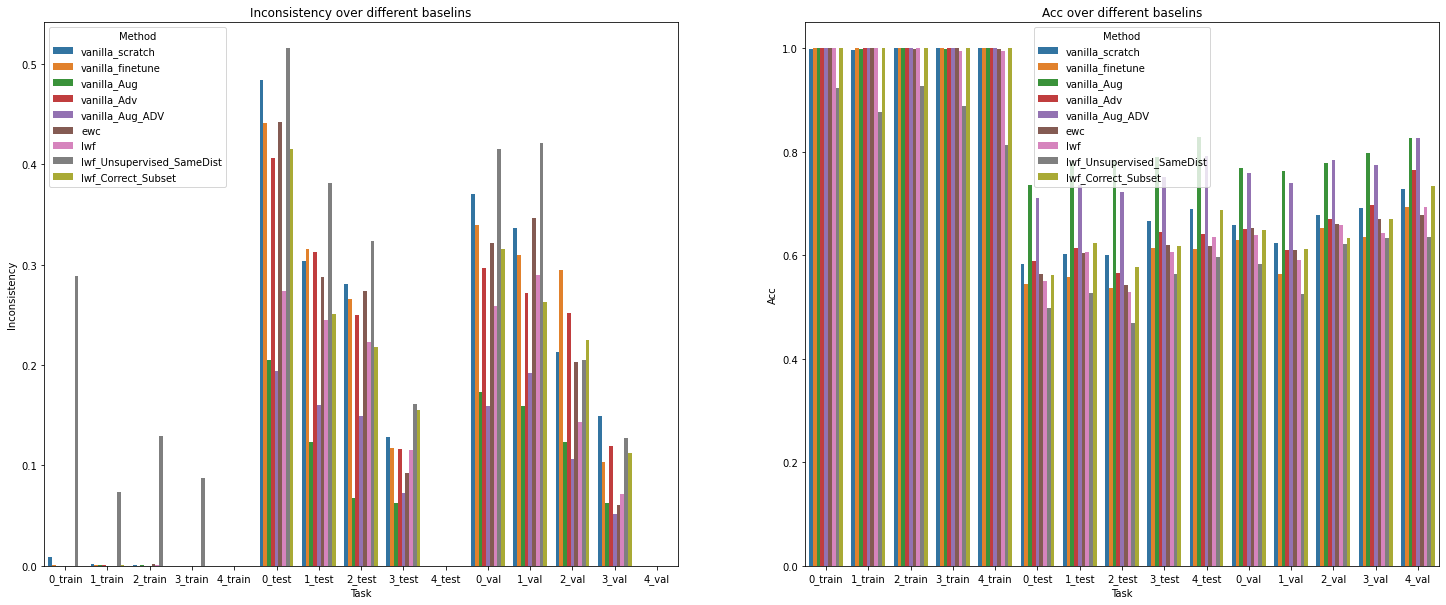

In [8]:
epps = EPPS()
case = 1
if case  == 1:
    common_filter = ["cifar10", "small", "ResNet18_1.0e-03","CTdata", "FixInit"]#"CvgS200"]"small",
    for i in range(1):
        rec = {}
        epps.load(sname(["scratch"]))#, "small_"]
        epps.set_order("sequential")
        read_result(epps, "vanilla_scratch")
        
        epps.load(sname(["vanilla"]))#, "small_"]
        epps.set_order("sequential")
        read_result(epps, "vanilla_finetune")
        
        epps.load(sname(["#Aug_CF_R"]))
        epps.set_order("sequential")
        read_result(epps, "vanilla_Aug")

        epps.load(sname(["#Aug_CF_ADV_R"]))
        epps.set_order("sequential")
        read_result(epps, "vanilla_Aug_ADV")

        epps.load(sname(["#Aug_ADV"]))
        epps.set_order("sequential")
        read_result(epps, "vanilla_Adv")
        
        #epps.load(sname(["scratch"]))
        #epps.set_order("sequential")
        #read_result(epps, "vanilla_scratch")
        
        epps.load(sname(["#lwf1.00e+00_DS"]))
        epps.set_order("sequential")
        read_result(epps, "lwf")

        epps.load(sname(["#lwf1.00e+00_unsup"]))
        epps.set_order("sequential")
        read_result(epps, "lwf_Unsupervised_SameDist")

        epps.load(sname(["#lwf1.00e+00#corrset"]))
        epps.set_order("sequential")
        read_result(epps, "lwf_Correct_Subset")  

        epps.load(sname(["#ewc"]))
        epps.set_order("sequential")
        read_result(epps,"ewc")
        draw_pic("Data_Inc_seed_{}".format(i),\
                 names=[ "vanilla_scratch", "vanilla_finetune", "vanilla_Aug", "vanilla_Adv", "vanilla_Aug_ADV", "ewc", "lwf", "lwf_Unsupervised_SameDist", "lwf_Correct_Subset"])   
elif case == 2:
    common_filter = ["cifar10", "small", "ResNet18_1.0e-03","CTdata", "CvgD9.90e-01_CvgT1.000000e-03"]
    for i in range(1):
        rec = {}
        #epps.load("results/cifar10_5_domain_inc")
        epps.load(sname(["vanilla"]))
        epps.set_order("sequential")
        read_result(epps, "vanilla_finetune")

        epps.load(sname(["scratch"]))
        epps.set_order("sequential")
        read_result(epps, "vanilla_scratch")
        
        epps.load(sname(["#lwf1.00e+00_DS"]))
        epps.set_order("sequential")
        read_result(epps, "lwf")

        epps.load(sname(["#lwf1.00e+00_unsup"]))
        epps.set_order("sequential")
        read_result(epps, "lwf_Unsupervised_SameDist")

        epps.load(sname(["#lwf1.00e+00#corrset"]))
        epps.set_order("sequential")
        read_result(epps, "lwf_Correct_Subset")  

        epps.load(sname(["#ewc"]))
        epps.set_order("sequential")
        read_result(epps,"ewc")

        draw_pic("Data_Inc_seed_{}".format(i),\
                 names=["vanilla_scratch", "vanilla_finetune", "ewc", "lwf", "lwf_Unsupervised_SameDist", "lwf_Correct_Subset"])    
elif case ==3:
    for i in range(1):
        rec = {}
        #epps.load("results/cifar10_5_domain_inc")
        epps.load("results/cifar10_ResNet18_1.0e-02_#vanilla_DScifar10_CIMmask_CTdomain_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        read_result(epps, "vanilla_finetune")
        epps.load("results/cifar10_ResNet18_1.0e-02_#lwf1.00e+00_DScifar10_CIMmask_CTdomain_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        read_result(epps, "lwf")
        epps.load("results/cifar10_ResNet18_1.0e-02_#ewc5.00e+03_DScifar10_CIMmask_CTdomain_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        read_result(epps,"ewc")
        epps.load("results/cifar10_ResNet18_1.0e-02_#scratch_DScifar10_CIMmask_CTdomain_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        read_result(epps, "vanilla_scratch")
        """epps.load("results/cifar10_ResNet18_1.0e-02_#lwf1.00e+00#scratch_DScifar10_CIMmask_CTdomain_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        read_result(epps, "lwf_scratch")
        epps.load("results/cifar10_ResNet18_1.0e-02_#ewc5.00e+03#scratch_DScifar10_CIMmask_CTdomain_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        read_result(epps,"ewc_scratch")"""
        draw_pic("Domain_Inc_seed_{}".format(i),\
                 names=["vanilla_scratch", "vanilla_finetune", "ewc", "lwf"]) 
elif case == 4:
    for i in range(1):
        rec = {}
        #epps.load("results/cifar10_5_domain_inc")
        epps.load("results/cifar10_ResNet18_1.0e-02_#vanilla_DScifar10_CIMmask_CTdata_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        epps.set_order("sequential")
        read_result(epps, "vanilla_finetune")
        epps.load("results/cifar10_ResNet18_1.0e-02_#lwf1.00e+00_DScifar10_CIMmask_CTdata_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        epps.set_order("sequential")
        read_result(epps, "lwf")
        epps.load("results/cifar10_ResNet18_1.0e-02_#scratch_DScifar10_CIMmask_CTdata_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        epps.set_order("sequential")
        read_result(epps, "vanilla_scratch")
        epps.load("results/cifar10_ResNet18_1.0e-02_#ewc5.00e+03_DScifar10_CIMmask_CTdata_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        epps.set_order("sequential")
        read_result(epps,"ewc")
        """epps.load("results/cifar10_ResNet18_1.0e-02_#lwf1.00e+00#scratch_DScifar10_CIMmask_CTdata_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        read_result(epps, "lwf_scratch")
        epps.load("results/cifar10_ResNet18_1.0e-02_#ewc5.00e+03#scratch_DScifar10_CIMmask_CTdata_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5/Seed{}".format(i))
        read_result(epps,"ewc_scratch")"""
        draw_pic("Data_Inc_seed_{}".format(i),\
                 names=["vanilla_scratch", "vanilla_finetune", "ewc", "lwf"]) 

In [ ]:
from cl.utils import get_fixed_random_generator
import itertools
print(list(itertools.islice(get_fixed_random_generator(10,1), 5)))

In [ ]:
print(epps.names)
print(epps.hist_version["pertask_0_test"][:10,:10])